In [1]:
import pandas as pd
import numpy as np

In [2]:
ratings_data = pd.read_csv("ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [3]:
movie_names = pd.read_csv("movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_data = pd.merge(ratings_data, movie_names, on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,169,2.5,1204927694,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama
1,13,169,1.0,974868393,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama
2,14,169,3.0,845470321,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama
3,17,169,1.0,944991371,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama
4,68,169,1.0,1011092044,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama


In [5]:
movie_data.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)                               2.775362
#1 Cheerleader Camp (2010)                                     2.500000
#chicagoGirl: The Social Network Takes on a Dictator (2013)    3.666667
$ (Dollars) (1971)                                             2.740741
$5 a Day (2008)                                                2.980000
Name: rating, dtype: float64

In [6]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
A Small September Affair (2014)    5.0
The Defiant Ones (1986)            5.0
Just Walking (2008)                5.0
Junior Prom (1946)                 5.0
Another World (2014)               5.0
Name: rating, dtype: float64

In [7]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 81296
Pulp Fiction (1994)                 79091
Shawshank Redemption, The (1994)    77887
Silence of the Lambs, The (1991)    76271
Jurassic Park (1993)                69545
Name: rating, dtype: int64

In [8]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

In [9]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [10]:
ratings_mean_count.head()

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",2.775362,207
#1 Cheerleader Camp (2010),2.500000,5
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667,3
$ (Dollars) (1971),2.740741,27
$5 a Day (2008),2.980000,50


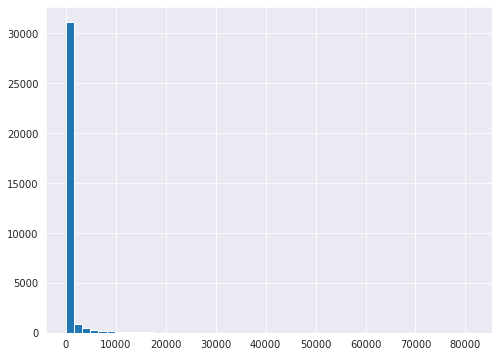

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

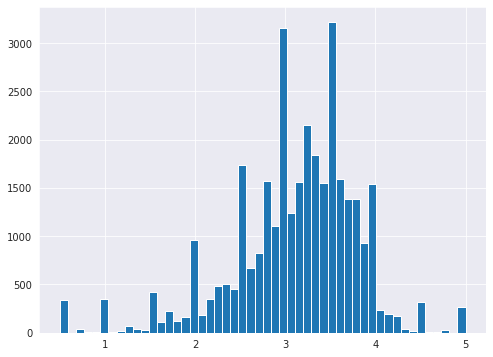

In [12]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

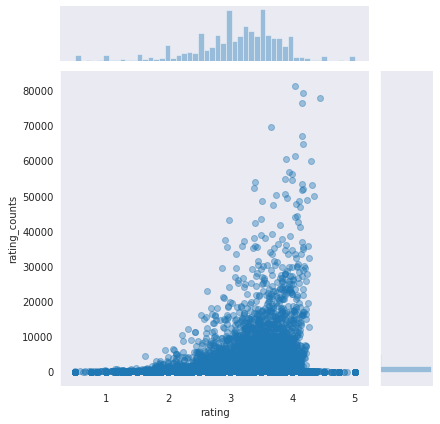

In [13]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [14]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')

ValueError: Unstacked DataFrame is too big, causing int32 overflow

In [ ]:
user_movie_rating.head()

In [ ]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']

In [ ]:
forrest_gump_ratings.head()

In [ ]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

In [ ]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)

In [ ]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump.head()

In [ ]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()